In [2]:
# Run this and restart session
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.9 M

### Restart your module now by clicking the restart button in the end of the above output or on top right side corner near RAM, Disk. Then run the next line of code. This makes sure that the code above is correctly installed and ready for use in the local environment.

In [3]:
!pwd

/content


# Import Packages & Libraries and mount Drive

### We do this so instead of uploading files again and again into google colab ,we can upload files once in our drive with the name "revolut_train.csv" and "revolut_test.csv" and the program will access them automatically every time we run the program.

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

# for visualization
from sklearn import tree
import matplotlib.pyplot as plt

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from pycaret.regression import *


# Read Data into Enviroment

In [7]:
data_train = pd.read_csv("drive/MyDrive/revolut_train.csv")
data_test = pd.read_csv("drive/MyDrive/revolut_test.csv")


# Describe Data

In [8]:
# Checking Size of the train test split
data_train.shape
data_test.shape
print(f"Total data has {data_train.shape[0]+data_test.shape[0]} rows, {data_test.shape[1]} columns. \nIt has 1 target column is_claim which is binary. ")
print(f"Total data has {data_train.shape[0]} and {data_test.shape[0]} rows, {data_test.shape[1]} columns. \nIt has 1 target column is_claim which is binary. ")
print(f"Train-Test split is {round((data_train.shape[0])/(data_train.shape[0]+data_test.shape[0])*100)} - {round((data_test.shape[0])/(data_train.shape[0]+data_test.shape[0])*100)}")

Total data has 97655 rows, 43 columns. 
It has 1 target column is_claim which is binary. 
Total data has 58592 and 39063 rows, 43 columns. 
It has 1 target column is_claim which is binary. 
Train-Test split is 60 - 40


In [9]:
# See what Columns are in Train
train_col=data_train.columns.tolist()

In [10]:
### Writing in a fancy way to format print into using proper horizontal and vertical space
print(f"{train_col[0:10]} \n {train_col[10:19]} \n {train_col[19:29]} \n {train_col[29:35]} \n {train_col[35:40]} \n {train_col[40:44]} \n", sep=' ')

['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type'] 
 ['max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera'] 
 ['rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height'] 
 ['gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist'] 
 ['is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror'] 
 ['is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'] 



# Checking for correlation among features

In [11]:
# correlation_matrix_data=data_train.loc[:,['policy_tenure','age_of_car']].corr()
correlation_matrix_data=data_train.corr()

<Axes: >

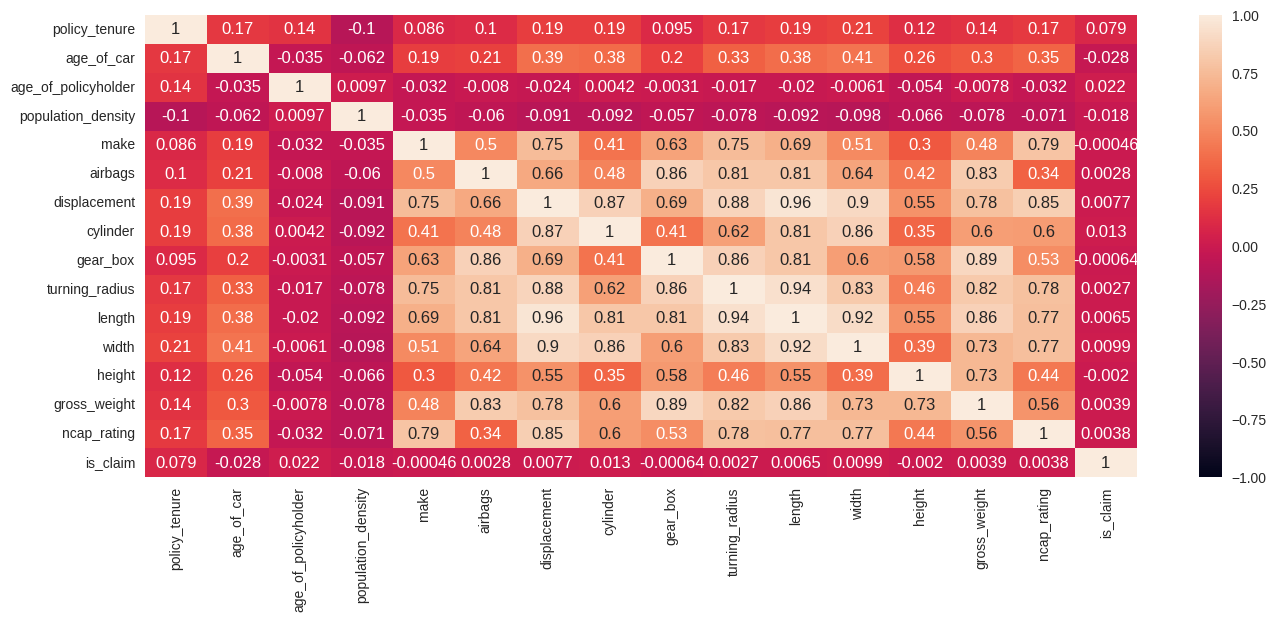

In [12]:
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix_data,vmin=-1,vmax=1,annot=True)

## Correlation among car variables is very very high, we will isolate and see if we can eliminate a few and recheck our results

In [13]:
# Deep= True makes a true copy rather than a reference copy in memory
car_data=data_train.copy(deep=True)

In [14]:
car_data.drop(columns=['policy_id','policy_tenure','area_cluster','age_of_policyholder','population_density'],inplace=True)

In [15]:
data_train.loc[:,['max_power']]

max_power
0       40.36bhp@6000rpm
1       40.36bhp@6000rpm
2       40.36bhp@6000rpm
3       88.50bhp@6000rpm
4       67.06bhp@5500rpm
...                  ...
58587   67.06bhp@5500rpm
58588   40.36bhp@6000rpm
58589   40.36bhp@6000rpm
58590   88.50bhp@6000rpm
58591  113.45bhp@4000rpm

[58592 rows x 1 columns]

In [16]:
car_data[['Nm', 'RPM']] = car_data['max_torque'].str.extract(r'(\d+\.?\d*)Nm@(\d+)rpm').astype(float)

In [17]:
car_data.drop(columns=['max_power','max_torque'],inplace=True)
car_data.reset_index(drop=True)

age_of_car  make segment model fuel_type         engine_type  airbags  \
0            0.05     1       A    M1       CNG   F8D Petrol Engine        2   
1            0.02     1       A    M1       CNG   F8D Petrol Engine        2   
2            0.02     1       A    M1       CNG   F8D Petrol Engine        2   
3            0.11     1      C1    M2    Petrol  1.2 L K12N Dualjet        2   
4            0.11     2       A    M3    Petrol             1.0 SCe        2   
...           ...   ...     ...   ...       ...                 ...      ...   
58587        0.13     2       A    M3    Petrol             1.0 SCe        2   
58588        0.02     1       A    M1       CNG   F8D Petrol Engine        2   
58589        0.05     1       A    M1       CNG   F8D Petrol Engine        2   
58590        0.14     1      B2    M6    Petrol   K Series Dual jet        2   
58591        0.02     3      C2    M4    Diesel       1.5 L U2 CRDi        6   

      is_esc is_adjustable_steering is_tpms  ... is_central_locking  \
0         No                     No      No  ...                 No   
1         No                     No      No  ...                 No   
2         No                     No      No  ...                 No   
3        Yes                    Yes      No  ...                Yes   
4         No                     No      No  ...                Yes   
...      ...                    ...     ...  ...                ...   
58587     No                     No      No  ...                Yes   
58588     No                     No      No  ...                 No   
58589     No                     No      No  ...                 No   
58590     No                    Yes      No  ...                Yes   
58591    Yes                    Yes     Yes  ...                Yes   

      is_power_steering is_driver_seat_height_adjustable  \
0                   Yes                               No   
1                   Yes                               No   
2                   Yes                               No   
3                   Yes                              Yes   
4                   Yes                               No   
...                 ...                              ...   
58587               Yes                               No   
58588               Yes                               No   
58589               Yes                               No   
58590               Yes                              Yes   
58591               Yes                              Yes   

       is_day_night_rear_view_mirror  is_ecw is_speed_alert  ncap_rating  \
0                                 No      No            Yes            0   
1                                 No      No            Yes            0   
2                                 No      No            Yes            0   
3                                Yes     Yes            Yes            2   
4                                Yes     Yes            Yes            2   
...                              ...     ...            ...          ...   
58587                            Yes     Yes            Yes            2   
58588                             No      No            Yes            0   
58589                             No      No            Yes            0   
58590                            Yes     Yes            Yes            2   
58591                             No     Yes            Yes            3   

      is_claim     Nm     RPM  
0            0   60.0  3500.0  
1            0   60.0  3500.0  
2            0   60.0  3500.0  
3            0  113.0  4400.0  
4            0   91.0  4250.0  
...        ...    ...     ...  
58587        0   91.0  4250.0  
58588        0   60.0  3500.0  
58589        0   60.0  3500.0  
58590        0  113.0  4400.0  
58591        0  250.0  2750.0  

[58592 rows x 39 columns]

In [18]:
car_data.columns

Index(['age_of_car', 'make', 'segment', 'model', 'fuel_type', 'engine_type',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'Nm', 'RPM'],
      dtype='object')

In [19]:
car_data.head()

age_of_car  make segment model fuel_type         engine_type  airbags  \
0        0.05     1       A    M1       CNG   F8D Petrol Engine        2   
1        0.02     1       A    M1       CNG   F8D Petrol Engine        2   
2        0.02     1       A    M1       CNG   F8D Petrol Engine        2   
3        0.11     1      C1    M2    Petrol  1.2 L K12N Dualjet        2   
4        0.11     2       A    M3    Petrol             1.0 SCe        2   

  is_esc is_adjustable_steering is_tpms  ... is_central_locking  \
0     No                     No      No  ...                 No   
1     No                     No      No  ...                 No   
2     No                     No      No  ...                 No   
3    Yes                    Yes      No  ...                Yes   
4     No                     No      No  ...                Yes   

  is_power_steering is_driver_seat_height_adjustable  \
0               Yes                               No   
1               Yes                               No   
2               Yes                               No   
3               Yes                              Yes   
4               Yes                               No   

   is_day_night_rear_view_mirror  is_ecw is_speed_alert  ncap_rating is_claim  \
0                             No      No            Yes            0        0   
1                             No      No            Yes            0        0   
2                             No      No            Yes            0        0   
3                            Yes     Yes            Yes            2        0   
4                            Yes     Yes            Yes            2        0   

      Nm     RPM  
0   60.0  3500.0  
1   60.0  3500.0  
2   60.0  3500.0  
3  113.0  4400.0  
4   91.0  4250.0  

[5 rows x 39 columns]

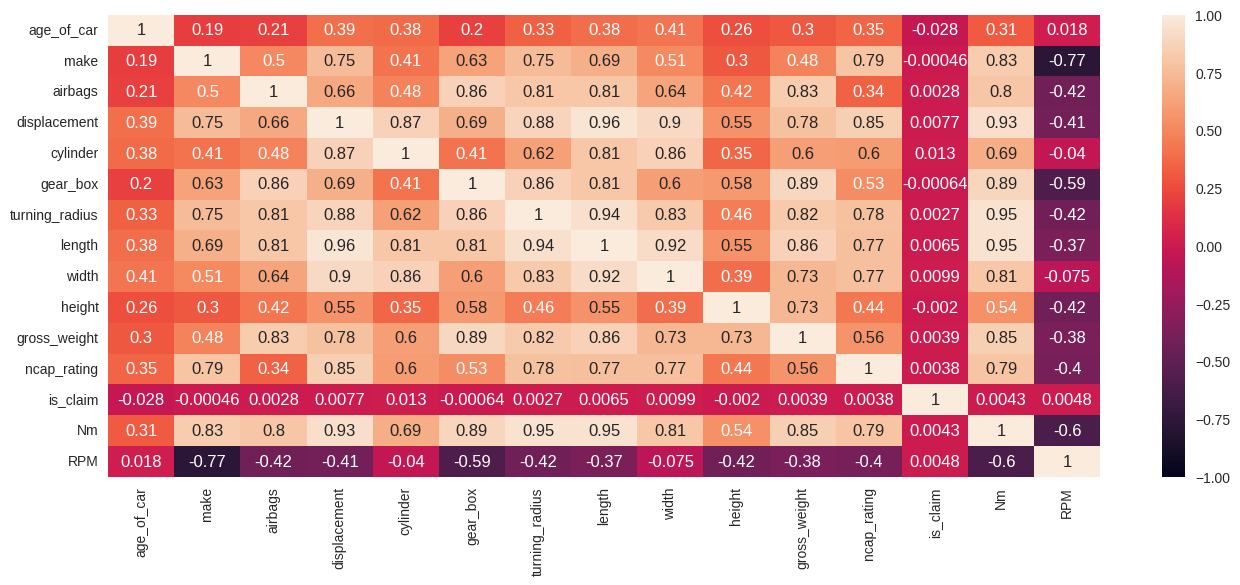

In [20]:
plt.figure(figsize=(16, 6))
sns.heatmap(car_data.corr(),vmin=-1,vmax=1,annot=True)
plt.savefig("Complete_data_correlation.png")

Based on the above correlation matrix, it would make sense to drop the following: Make, NM, length,width,gearbox, displacement and height. Newer cars have higher RPM and older cars have lower RPM,therefore we can substitute out features that would identify certain cars. Secondly, risk driving can be related to RPM for power, gross weight for strength of brakes, cylinder, airbags, age.

In [21]:
car_data_final=car_data.loc[:,['RPM','gross_weight','cylinder','airbags','age_of_car','is_claim']]

In [22]:
car_data_final.head()

RPM  gross_weight  cylinder  airbags  age_of_car  is_claim
0  3500.0          1185         3        2        0.05         0
1  3500.0          1185         3        2        0.02         0
2  3500.0          1185         3        2        0.02         0
3  4400.0          1335         4        2        0.11         0
4  4250.0          1155         3        2        0.11         0

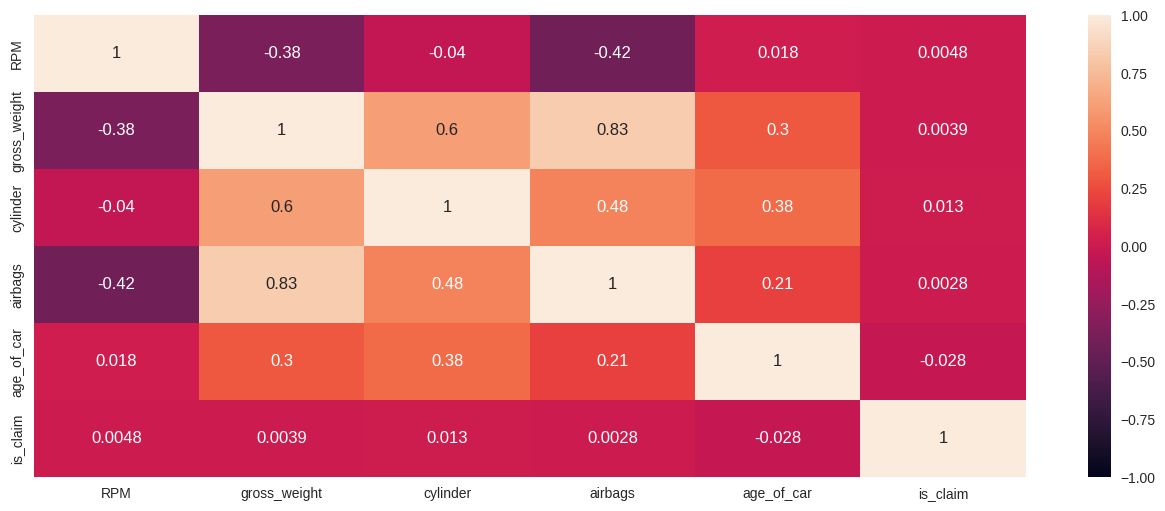

In [23]:
plt.figure(figsize=(16, 6))
sns.heatmap(car_data_final.corr(),vmin=-1,vmax=1,annot=True)
plt.savefig("car_data_correlation.png")

## Correlation among human data

In [24]:
# Deep= True makes a true copy rather than a reference copy in memory
human_data=data_train.copy(deep=True)

In [25]:
human_data=human_data.loc[:,['policy_id','policy_tenure','age_of_policyholder','population_density','area_cluster','is_claim']]

In [26]:
corr_humans=human_data.corr()

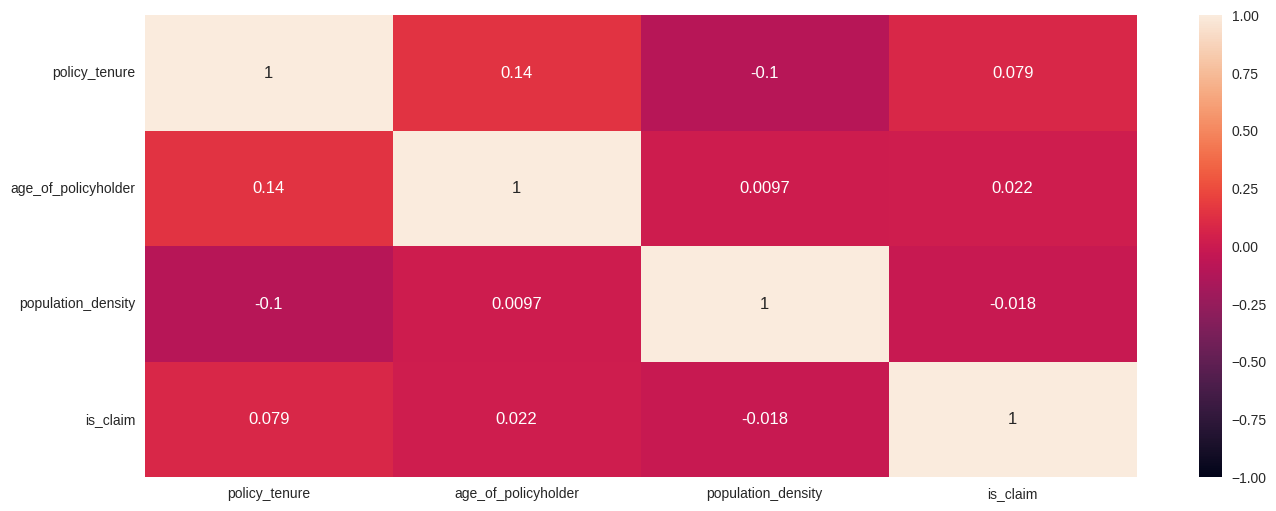

In [27]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr_humans,vmin=-1,vmax=1,annot=True)
plt.savefig("humans_correlation.png")

### All human side variables are good with very low correlation

## Checking for null values and unique values in entire dataset

In [28]:
# Columns Testing
test_col=data_test.columns.tolist()
print(test_col)

['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']


In [29]:
# For working on data copy and not actual data, in case of corruption can reload easily
data=data_train.copy(deep=True)

In [30]:
data.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [31]:
# Check first 5 entries
print(data_train.head())

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No  

In [32]:
# Checking for unique values
data.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [33]:
# Store Unique values
unique_val_dict={}
for x in train_col:
  unique_val=data[x].unique().tolist()
  unique_val_dict[x]=unique_val

print(unique_val_dict)

{'policy_id': ['ID00001', 'ID00002', 'ID00003', 'ID00004', 'ID00005', 'ID00006', 'ID00007', 'ID00008', 'ID00009', 'ID00010', 'ID00011', 'ID00012', 'ID00013', 'ID00014', 'ID00015', 'ID00016', 'ID00017', 'ID00018', 'ID00019', 'ID00020', 'ID00021', 'ID00022', 'ID00023', 'ID00024', 'ID00025', 'ID00026', 'ID00027', 'ID00028', 'ID00029', 'ID00030', 'ID00031', 'ID00032', 'ID00033', 'ID00034', 'ID00035', 'ID00036', 'ID00037', 'ID00038', 'ID00039', 'ID00040', 'ID00041', 'ID00042', 'ID00043', 'ID00044', 'ID00045', 'ID00046', 'ID00047', 'ID00048', 'ID00049', 'ID00050', 'ID00051', 'ID00052', 'ID00053', 'ID00054', 'ID00055', 'ID00056', 'ID00057', 'ID00058', 'ID00059', 'ID00060', 'ID00061', 'ID00062', 'ID00063', 'ID00064', 'ID00065', 'ID00066', 'ID00067', 'ID00068', 'ID00069', 'ID00070', 'ID00071', 'ID00072', 'ID00073', 'ID00074', 'ID00075', 'ID00076', 'ID00077', 'ID00078', 'ID00079', 'ID00080', 'ID00081', 'ID00082', 'ID00083', 'ID00084', 'ID00085', 'ID00086', 'ID00087', 'ID00088', 'ID00089', 'ID000

In [34]:
# Need to slice it to remove policy_id which is unique, policy tenure, age of car, age of policy holder, area cluster, population_density
# Then check for duplicates
for index,value in enumerate(train_col):
  print(index,value)

0 policy_id
1 policy_tenure
2 age_of_car
3 age_of_policyholder
4 area_cluster
5 population_density
6 make
7 segment
8 model
9 fuel_type
10 max_torque
11 max_power
12 engine_type
13 airbags
14 is_esc
15 is_adjustable_steering
16 is_tpms
17 is_parking_sensors
18 is_parking_camera
19 rear_brakes_type
20 displacement
21 cylinder
22 transmission_type
23 gear_box
24 steering_type
25 turning_radius
26 length
27 width
28 height
29 gross_weight
30 is_front_fog_lights
31 is_rear_window_wiper
32 is_rear_window_washer
33 is_rear_window_defogger
34 is_brake_assist
35 is_power_door_locks
36 is_central_locking
37 is_power_steering
38 is_driver_seat_height_adjustable
39 is_day_night_rear_view_mirror
40 is_ecw
41 is_speed_alert
42 ncap_rating
43 is_claim


## Checking all unique values for all columns

In [35]:
for x in range(6,43,1):
  print(f"Col: {train_col[x]}\nColumn Value: {unique_val_dict[train_col[x]]}")

Col: make
Column Value: [1, 2, 3, 4, 5]
Col: segment
Column Value: ['A', 'C1', 'C2', 'B2', 'B1', 'Utility']
Col: model
Column Value: ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11']
Col: fuel_type
Column Value: ['CNG', 'Petrol', 'Diesel']
Col: max_torque
Column Value: ['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm', '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm', '170Nm@4000rpm']
Col: max_power
Column Value: ['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm', '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm', '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm']
Col: engine_type
Column Value: ['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe', '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet', '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B', '1.5 Turbocharged Revotron']
Col: airbags
Column Value: [2, 6, 1]
Col: is_esc
Column Value: ['No', 'Yes']
Col: is_adjustable_steering
Column Va

In [36]:
# Total duplicate entries
data.loc[:,'make':'is_claim'].duplicated().sum()

58570

In [37]:
# Total data size
data.loc[:,'make':'is_claim'].shape[0]

58592

In [38]:
# Unique values
data.loc[:,'make':'is_claim'].shape[0]-data.loc[:,'make':'is_claim'].duplicated().sum()

22

In [39]:
# Duplicate entries make considerable portion of data, hence data is not viable
print(f"Percentage of total data that is duplicated {(data.loc[:,'make':'is_claim'].duplicated().sum()/data.shape[0])*100}")

Percentage of total data that is duplicated 99.96245221190605


In [40]:
# Checking for unique values
print(pd.DataFrame(data.loc[:,'make':'is_claim'].drop_duplicates()))

      make  segment model fuel_type      max_torque          max_power  \
0        1        A    M1       CNG    60Nm@3500rpm   40.36bhp@6000rpm   
3        1       C1    M2    Petrol   113Nm@4400rpm   88.50bhp@6000rpm   
4        2        A    M3    Petrol    91Nm@4250rpm   67.06bhp@5500rpm   
5        3       C2    M4    Diesel   250Nm@2750rpm  113.45bhp@4000rpm   
6        4       B2    M5    Diesel   200Nm@3000rpm   88.77bhp@4000rpm   
7        1       B2    M6    Petrol   113Nm@4400rpm   88.50bhp@6000rpm   
9        1       B2    M7    Petrol   113Nm@4400rpm   88.50bhp@6000rpm   
11       1       B1    M8       CNG  82.1Nm@3400rpm   55.92bhp@5300rpm   
12       1       B2    M6    Petrol   113Nm@4400rpm   88.50bhp@6000rpm   
17       5       C1    M9    Diesel   200Nm@1750rpm   97.89bhp@3600rpm   
21       1        A    M1       CNG    60Nm@3500rpm   40.36bhp@6000rpm   
22       1  Utility   M10       CNG    85Nm@3000rpm   61.68bhp@6000rpm   
23       3       C2    M4    Diesel   

# Store Unique Rows as New Dataframe

In [41]:
# Store them uniquely
data_non_duplicated=data.iloc[data.loc[:,'make':'is_claim'].drop_duplicates().index].reset_index()

In [42]:
data_non_duplicated.shape

(22, 45)

In [43]:
data.loc[:,['max_torque','max_power']].head()

max_torque         max_power
0   60Nm@3500rpm  40.36bhp@6000rpm
1   60Nm@3500rpm  40.36bhp@6000rpm
2   60Nm@3500rpm  40.36bhp@6000rpm
3  113Nm@4400rpm  88.50bhp@6000rpm
4   91Nm@4250rpm  67.06bhp@5500rpm

In [44]:
data_non_duplicated.head()

index policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0      0   ID00001       0.515874        0.05             0.644231   
1      3   ID00004       0.900277        0.11             0.432692   
2      4   ID00005       0.596403        0.11             0.634615   
3      5   ID00006       1.018709        0.07             0.519231   
4      6   ID00007       0.097992        0.16             0.403846   

  area_cluster  population_density  make segment model  ... is_brake_assist  \
0           C1                4990     1       A    M1  ...              No   
1           C4               21622     1      C1    M2  ...             Yes   
2           C5               34738     2       A    M3  ...              No   
3           C6               13051     3      C2    M4  ...             Yes   
4           C7                6112     4      B2    M5  ...              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                 Yes                Yes               Yes   
2                 Yes                Yes               Yes   
3                 Yes                Yes               Yes   
4                 Yes                Yes               Yes   

   is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                                No                            No     No   
1                               Yes                           Yes    Yes   
2                                No                           Yes    Yes   
3                               Yes                            No    Yes   
4                                No                            No    Yes   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           2        0  
2            Yes           2        0  
3            Yes           3        0  
4            Yes           5        0  

[5 rows x 45 columns]

In [45]:
# Now we know that our dataset based on different policy numbers is unique and only 22 different type of instances of variables occur
# We will proceed believing that the dataset would yield us significant result based on the theory that given the size of sample
# It is highly possible that only a fixed number of instances involving fixed number of cars with very specific specifications occurs
# Additionally of these fixed number of cars very limited data has been collected therefore we shall note performance of model based on training on complete data
# which would include duplicated values and then non duplicated values as well

In [46]:
# Running using complete dataset as is

# Describe Data 2.0

In [47]:
data.describe()

policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786      0.483616      0.430353   
min        1.000000      1.000000    796.000000      3.000000      5.000000   
25%        1.000000      2.000000    796.000000      3.000000      5.000000   
50%        1.000000      2.000000   1197.000000      4.000000      5.000000   
75%        3.000000      6.000000   1493.000000      4.000000      5.000000   
max        5.000000      6.000000   1498.000000      4.000000      6.000000   

       turning_radius        length         width       height  gross_weight  \
count    58592.000000  58592.000000  58592.000000  58592.00000  58592.000000   
mean         4.852893   3850.476891   1672.233667   1553.33537   1385.276813   
std          0.228061    311.457119    112.089135     79.62227    212.423085   
min          4.500000   3445.000000   1475.000000   1475.00000   1051.000000   
25%          4.600000   3445.000000   1515.000000   1475.00000   1185.000000   
50%          4.800000   3845.000000   1735.000000   1530.00000   1335.000000   
75%          5.000000   3995.000000   1755.000000   1635.00000   1510.000000   
max          5.200000   4300.000000   1811.000000   1825.00000   1720.000000   

        ncap_rating      is_claim  
count  58592.000000  58592.000000  
mean       1.759950      0.063968  
std        1.389576      0.244698  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        2.000000      0.000000  
75%        3.000000      0.000000  
max        5.000000      1.000000

In [48]:
data.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [49]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [50]:
data.duplicated().value_counts()

False    58592
dtype: int64

In [51]:
data.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [52]:
data.shape

(58592, 44)

# Data Copy to work and manipulate models on:

In [53]:
# slicing the index off from the entire dataset along with policy_id
data_train2=data.iloc[:,1:44]

In [54]:
data_train2.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

# Initial Automatic Model

## Model Building using entire data without any column manipulation

In [55]:
s = setup(data_train2, target = 'is_claim', session_id = 123)

In [56]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [57]:
best=s.compare_models(['gbr','ada','lightgbm','rf','xgboost','ridge','lasso','lr','dt','knn','dummy'])

Processing:   0%|          | 0/49 [00:00<?, ?it/s]

In [58]:
results=pull()

In [59]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [60]:
# the pycaret function automatically loads dataset and transforms the variables using hot one encoding or dummy variable creation and accordingly scales them
# this is how the data looks like after transformation
get_config('dataset_transformed')

policy_tenure  age_of_car  age_of_policyholder  area_cluster_C19  \
37981       0.416891        0.06             0.298077               1.0   
35672       0.041378        0.06             0.663462               0.0   
35707       1.045650        0.14             0.355769               0.0   
33154       1.230258        0.07             0.480769               0.0   
46779       1.060283        0.15             0.471154               0.0   
...              ...         ...                  ...               ...   
29483       1.022461        0.06             0.413462               0.0   
6519        0.207800        0.00             0.567308               0.0   
56153       1.071508        0.02             0.413462               0.0   
18365       0.553428        0.07             0.288462               0.0   
44602       1.145693        0.09             0.528846               0.0   

       area_cluster_C5  area_cluster_C12  area_cluster_C8  area_cluster_C14  \
37981              0.0               0.0              0.0               0.0   
35672              1.0               0.0              0.0               0.0   
35707              0.0               1.0              0.0               0.0   
33154              0.0               0.0              1.0               0.0   
46779              0.0               0.0              0.0               1.0   
...                ...               ...              ...               ...   
29483              0.0               0.0              1.0               0.0   
6519               0.0               0.0              0.0               0.0   
56153              0.0               0.0              1.0               0.0   
18365              0.0               0.0              0.0               0.0   
44602              0.0               0.0              1.0               0.0   

       area_cluster_C3  area_cluster_C2  ...  is_brake_assist  \
37981              0.0              0.0  ...              1.0   
35672              0.0              0.0  ...              1.0   
35707              0.0              0.0  ...              1.0   
33154              0.0              0.0  ...              1.0   
46779              0.0              0.0  ...              1.0   
...                ...              ...  ...              ...   
29483              0.0              0.0  ...              1.0   
6519               0.0              0.0  ...              0.0   
56153              0.0              0.0  ...              1.0   
18365              1.0              0.0  ...              0.0   
44602              0.0              0.0  ...              0.0   

       is_power_door_locks  is_central_locking  is_power_steering  \
37981                  1.0                 1.0                1.0   
35672                  1.0                 1.0                1.0   
35707                  1.0                 1.0                1.0   
33154                  1.0                 1.0                1.0   
46779                  1.0                 1.0                1.0   
...                    ...                 ...                ...   
29483                  1.0                 1.0                1.0   
6519                   0.0                 0.0                1.0   
56153                  1.0                 1.0                1.0   
18365                  0.0                 0.0                1.0   
44602                  1.0                 1.0                1.0   

       is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  \
37981                               1.0                            1.0   
35672                               1.0                            0.0   
35707                               1.0                            1.0   
33154                               1.0                            0.0   
46779                               1.0                            1.0   
...                                 ...                            ...   
29483                        

In [61]:
get_config('_available_plots')

{'pipeline': 'Pipeline Plot',
 'parameter': 'Hyperparameters',
 'residuals': 'Residuals',
 'error': 'Prediction Error',
 'cooks': 'Cooks Distance',
 'rfe': 'Feature Selection',
 'learning': 'Learning Curve',
 'manifold': 'Manifold Learning',
 'vc': 'Validation Curve',
 'feature': 'Feature Importance',
 'feature_all': 'Feature Importance (All)',
 'tree': 'Decision Tree',
 'residuals_interactive': 'Interactive Residuals'}

In [62]:
print(best)

GradientBoostingRegressor(random_state=123)


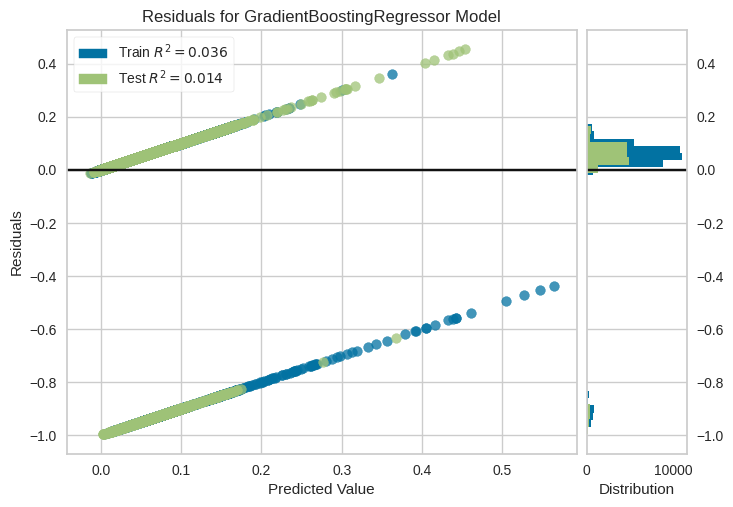

In [63]:
plot_model(best,plot='residuals')

In [64]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

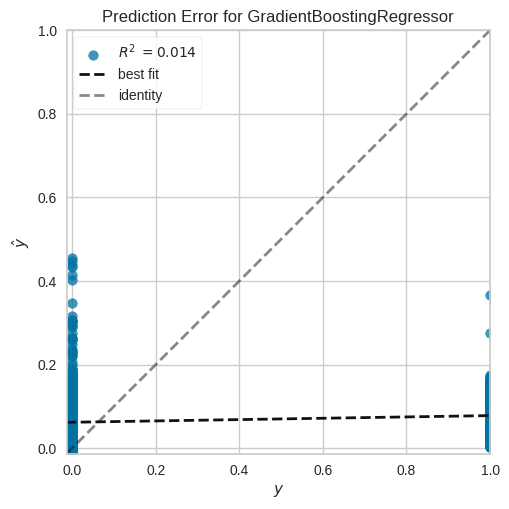

In [65]:
plot_model(best, plot = 'error')

In [66]:
predictions=predict_model(best,data=data_test)

In [67]:
predictions.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID58593       0.341732        0.00             0.586538           C3   
1   ID58594       0.307241        0.13             0.442308           C8   
2   ID58595       0.327924        0.12             0.451923           C8   
3   ID58596       0.782654        0.01             0.461538           C5   
4   ID58597       1.233404        0.02             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4076     1       A    M1       CNG  ...              No   
1                8794     1      B2    M6    Petrol  ...             Yes   
2                8794     2       A    M3    Petrol  ...              No   
3               34738     1       A    M1       CNG  ...              No   
4               34738     1       A    M1       CNG  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                 Yes                Yes                Yes   
2                 Yes                Yes                Yes   
3                  No                 No                Yes   
4                  No                 No                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                              Yes                           Yes    Yes   
2                               No                           Yes    Yes   
3                               No                            No     No   
4                               No                            No     No   

  is_speed_alert ncap_rating prediction_label  
0            Yes           0         0.146800  
1            Yes           2         0.056189  
2            Yes           2         0.046975  
3            Yes           0         0.057110  
4            Yes           0         0.062524  

[5 rows x 44 columns]

#### Results: The model is bad as the R2 is very low

## Model building using only unique entries of the entire data

In [68]:
# Training on unique rows only

In [69]:
data_non_duplicated=data_non_duplicated.drop(columns=['index'])

In [70]:
from pycaret.regression import *
s = setup(data_non_duplicated, target = 'is_claim', session_id = 123)

In [71]:
best=s.compare_models(['gbr','ada','lightgbm','rf','xgboost','ridge','lasso','lr','dt','knn','mlp','dummy'])

Processing:   0%|          | 0/53 [00:00<?, ?it/s]

R2 and MAPE do not work due to very small size

In [72]:
results=pull()

In [73]:
print(best)

GradientBoostingRegressor(random_state=123)


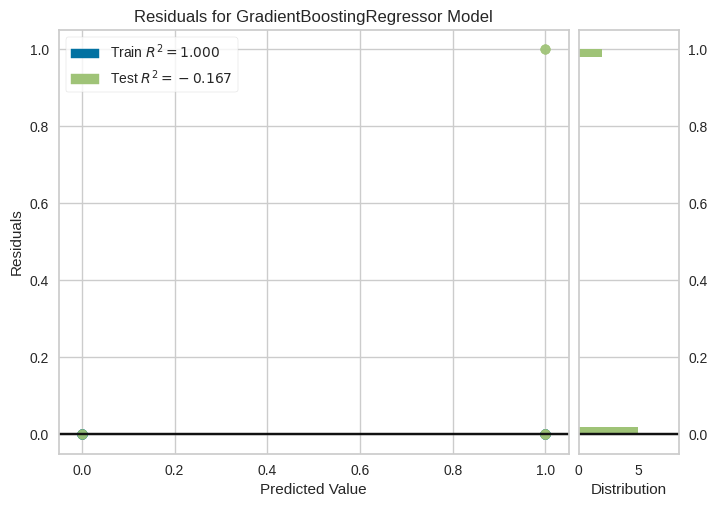

In [74]:
plot_model(best,plot='residuals')

In [75]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Important variables: age of car, policy tenure, area_cluster_c3, population_density

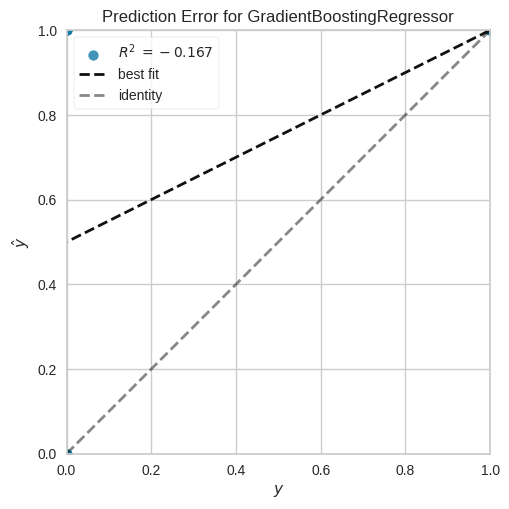

In [76]:
plot_model(best, plot = 'error')

In [77]:
predictions=predict_model(best,data=data_test)

In [78]:
predictions.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID58593       0.341732        0.00             0.586538           C3   
1   ID58594       0.307241        0.13             0.442308           C8   
2   ID58595       0.327924        0.12             0.451923           C8   
3   ID58596       0.782654        0.01             0.461538           C5   
4   ID58597       1.233404        0.02             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4076     1       A    M1       CNG  ...              No   
1                8794     1      B2    M6    Petrol  ...             Yes   
2                8794     2       A    M3    Petrol  ...              No   
3               34738     1       A    M1       CNG  ...              No   
4               34738     1       A    M1       CNG  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                 Yes                Yes                Yes   
2                 Yes                Yes                Yes   
3                  No                 No                Yes   
4                  No                 No                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                              Yes                           Yes    Yes   
2                               No                           Yes    Yes   
3                               No                            No     No   
4                               No                            No     No   

  is_speed_alert ncap_rating prediction_label  
0            Yes           0         0.999988  
1            Yes           2         0.000014  
2            Yes           2         0.000014  
3            Yes           0         0.999988  
4            Yes           0         0.999988  

[5 rows x 44 columns]

# Data Manipulation

## Removing unnecessary columns based on initial analysis

In [79]:
data.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [80]:
#data_train_columns_dropped

In [81]:
data_train_columns_dropped=data.loc[:,['policy_id','policy_tenure','age_of_policyholder','population_density','area_cluster','max_torque','gross_weight','cylinder','airbags','ncap_rating','age_of_car','is_claim']]

In [82]:
data_train_columns_dropped[['Nm', 'RPM']] = data_train_columns_dropped['max_torque'].str.extract(r'(\d+\.?\d*)Nm@(\d+)rpm').astype(float)

In [83]:
data_train_columns_dropped.drop(columns=['Nm','max_torque','policy_id'],inplace=True)

###### We can observe from synthetic and original unique values that an inherent imbalance has been tried to introduce in the synthetic data

In [84]:
data_train_columns_dropped['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [85]:
data_non_duplicated['is_claim'].value_counts()

0    11
1    11
Name: is_claim, dtype: int64

#### Creating dummy variables and normalizing the data

In [86]:
data_colsd_dum=pd.get_dummies(data=data_train_columns_dropped,columns=['area_cluster'],dtype=int)

In [87]:
list(data_colsd_dum.columns)[1]

'age_of_policyholder'

In [88]:
data_colsd_dum.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_tenure        58592 non-null  float64
 1   age_of_policyholder  58592 non-null  float64
 2   population_density   58592 non-null  int64  
 3   gross_weight         58592 non-null  int64  
 4   cylinder             58592 non-null  int64  
 5   airbags              58592 non-null  int64  
 6   ncap_rating          58592 non-null  int64  
 7   age_of_car           58592 non-null  float64
 8   is_claim             58592 non-null  int64  
 9   RPM                  58592 non-null  float64
 10  area_cluster_C1      58592 non-null  int64  
 11  area_cluster_C10     58592 non-null  int64  
 12  area_cluster_C11     58592 non-null  int64  
 13  area_cluster_C12     58592 non-null  int64  
 14  area_cluster_C13     58592 non-null  int64  
 15  area_cluster_C14     58592 non-null 

In [89]:
data_colsd_dum.describe()

policy_tenure  age_of_policyholder  population_density  gross_weight  \
count   58592.000000         58592.000000        58592.000000  58592.000000   
mean        0.611246             0.469420        18826.858667   1385.276813   
std         0.414156             0.122886        17660.174792    212.423085   
min         0.002735             0.288462          290.000000   1051.000000   
25%         0.210250             0.365385         6112.000000   1185.000000   
50%         0.573792             0.451923         8794.000000   1335.000000   
75%         1.039104             0.548077        27003.000000   1510.000000   
max         1.396641             1.000000        73430.000000   1720.000000   

           cylinder       airbags   ncap_rating    age_of_car      is_claim  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       3.626963      3.137066      1.759950      0.069424      0.063968   
std        0.483616      1.832641      1.389576      0.056721      0.244698   
min        3.000000      1.000000      0.000000      0.000000      0.000000   
25%        3.000000      2.000000      0.000000      0.020000      0.000000   
50%        4.000000      2.000000      2.000000      0.060000      0.000000   
75%        4.000000      6.000000      3.000000      0.110000      0.000000   
max        4.000000      6.000000      5.000000      1.000000      1.000000   

                RPM  ...  area_cluster_C20  area_cluster_C21  \
count  58592.000000  ...      58592.000000      58592.000000   
mean    3533.176031  ...          0.001860          0.006468   
std      725.960661  ...          0.043092          0.080167   
min     1750.000000  ...          0.000000          0.000000   
25%     2750.000000  ...          0.000000          0.000000   
50%     3500.000000  ...          0.000000          0.000000   
75%     4400.000000  ...          0.000000          0.000000   
max     4400.000000  ...          1.000000          1.000000   

       area_cluster_C22  area_cluster_C3  area_cluster_C4  area_cluster_C5  \
count      58592.000000     58592.000000     58592.000000     58592.000000   
mean           0.003533         0.104127         0.011350         0.119112   
std            0.059334         0.305428         0.105929         0.323923   
min            0.000000         0.000000         0.000000         0.000000   
25%            0.000000         0.000000         0.000000         0.000000   
50%            0.000000         0.000000         0.000000         0.000000   
75%            0.000000         0.000000         0.000000         0.000000   
max            1.000000         1.000000         1.000000         1.000000   

       area_cluster_C6  area_cluster_C7  area_cluster_C8  area_cluster_C9  
count     58592.000000     58592.000000     58592.000000     58592.000000  
mean          0.015190         0.036985         0.233035         0.046662  
std           0.122308         0.188726         0.422768         0.210915  
min           0.000000         0.000000         0.000000         0.000000  
25%           0.000000         0.000000         0.000000         0.000000  
50%           0.000000         0.000000         0.000000         0.000000  
75%           0.000000         0.000000         0.000000         0.000000  
max           1.000000         1.000000         1.000000         1.000000  

[8 rows x 32 columns]

In [90]:
data_colsd_dum_scaled=data_colsd_dum.copy(deep=True)

In [91]:
# Z-score scaling not useful as negative values do not make sense for the features, hence min-max scaling was done
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_colsd_dum_scaled.loc[:,['policy_tenure','age_of_policyholder','population_density','gross_weight','cylinder','airbags','RPM']] =scaler.fit_transform(data_colsd_dum.loc[:,['policy_tenure','age_of_policyholder','population_density','gross_weight','cylinder','airbags','RPM']])

In [92]:
data_colsd_dum_scaled

policy_tenure  age_of_policyholder  population_density  gross_weight  \
0           0.368130             0.500000            0.064260      0.200299   
1           0.480580             0.121622            0.365231      0.200299   
2           0.601457             0.135135            0.051764      0.200299   
3           0.643904             0.202703            0.291660      0.424514   
4           0.425902             0.486486            0.470987      0.155456   
...              ...                  ...                 ...           ...   
58587       0.252782             0.500000            0.116270      0.155456   
58588       0.858671             0.324324            0.102516      0.200299   
58589       0.831862             0.229730            0.470987      0.200299   
58590       0.884975             0.378378            0.116270      0.424514   
58591       0.087304             0.216216            0.116270      1.000000   

       cylinder  airbags  ncap_rating  age_of_car  is_claim       RPM  ...  \
0           0.0      0.2            0        0.05         0  0.660377  ...   
1           0.0      0.2            0        0.02         0  0.660377  ...   
2           0.0      0.2            0        0.02         0  0.660377  ...   
3           1.0      0.2            2        0.11         0  1.000000  ...   
4           0.0      0.2            2        0.11         0  0.943396  ...   
...         ...      ...          ...         ...       ...       ...  ...   
58587       0.0      0.2            2        0.13         0  0.943396  ...   
58588       0.0      0.2            0        0.02         0  0.660377  ...   
58589       0.0      0.2            0        0.05         0  0.660377  ...   
58590       1.0      0.2            2        0.14         0  1.000000  ...   
58591       1.0      1.0            3        0.02         0  0.377358  ...   

       area_cluster_C20  area_cluster_C21  area_cluster_C22  area_cluster_C3  \
0                     0                 0                 0                0   
1                     0                 0                 0                0   
2                     0                 0                 0                1   
3                     0                 0                 0                0   
4                     0                 0                 0                0   
...                 ...               ...               ...              ...   
58587                 0                 0                 0                0   
58588                 0                 0                 0                0   
58589                 0                 0                 0                0   
58590                 0                 0                 0                0   
58591                 0                 0                 0                0   

       area_cluster_C4  area_cluster_C5  area_cluster_C6  area_cluster_C7  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    1                0                0                0   
4                    0                1                0                0   
...                ...              ...              ...              ...   
58587                0                0                0                0   
58588                0                0                0                0   
58589                0                1                0                0   
58590                0                0                0                0   
58591                0                0                0                0   

       area_cluster_C8  area_cluster_C9  
0                    0                0  
1                    0                0  
2                    0                0  
3                    0                0  
4                    0   

## Under and Over sampling the data to create a balance

In [93]:
X_train=data_colsd_dum_scaled.copy(deep=True)
X_train=X_train.drop(columns=['is_claim'])
Y_train=data_colsd_dum_scaled.copy(deep=True).loc[:,'is_claim']

In [94]:
print(f"{X_train.shape} {Y_train.shape}")

(58592, 31) (58592,)


In [95]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [96]:
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.3)

In [97]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [98]:
X_train_re,Y_train_re =pipeline.fit_resample(X_train,Y_train)

In [99]:
data_processed = pd.concat([pd.DataFrame(X_train_re, columns=X_train_re.columns), pd.Series(Y_train_re, name='is_claim')], axis=1)


### Types of data based on initial analysis and processing:

#### 1. data,data_train- both these have complete dataset with duplicated valuesdata_processed

#### 2.data_non_duplicated-only unique values-22 values

#### 3.data_colsd_dum- removed unnecessary columns and created dummy for cats

#### 4.data_colsd_dum_scaled-scaled the step 3 values using min-max

#### 5.data_processed-under and over sampled further data from step 4

In [100]:
from pycaret.regression import *
s = setup(data_processed, target = 'is_claim', session_id = 123)

In [101]:
best=s.compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

After running all different datasets, it is observed that data_processed dataset is best and we observe it has the highest R2 among others.

In [102]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Important variables: age of car, age of policy_holder, policy tenure, population_density, gross weight, rpm

In [103]:
data_processed_imp=data_processed.copy(deep=True).loc[:,['age_of_car','age_of_policyholder','policy_tenure','population_density','gross_weight','RPM','ncap_rating','is_claim']]

## Running classifier for classify records correctly as claim or not
#### Prediction models were run to predict if any existing customers would file an insurance claim or not
#### Classification models would be for new customers and based on their profile would they file a claim or not majorly for profiling them to buckets

In [104]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data_processed_imp, target = 'is_claim', session_id = 123)

In [105]:
best=s.compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [106]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [107]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [108]:
s.plot_model(best, plot = 'feature',save=True)

'Feature Importance.png'

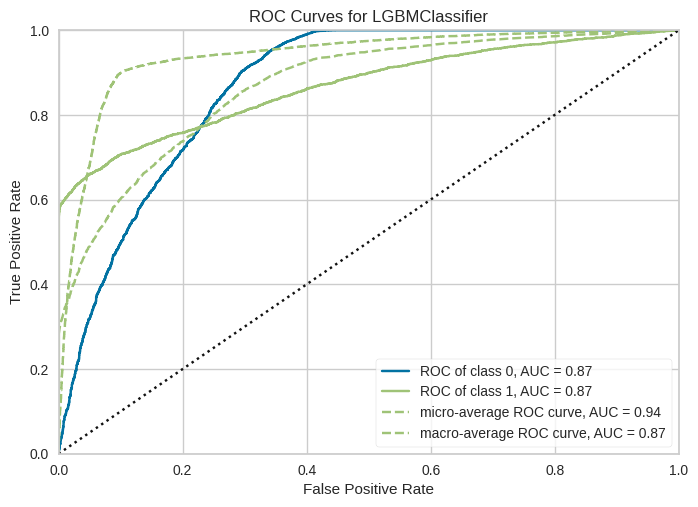

In [109]:
s.plot_model(best, plot = 'auc')

In [110]:
# Download model plots
s.plot_model(best, plot = 'auc',save=True)

'AUC.png'

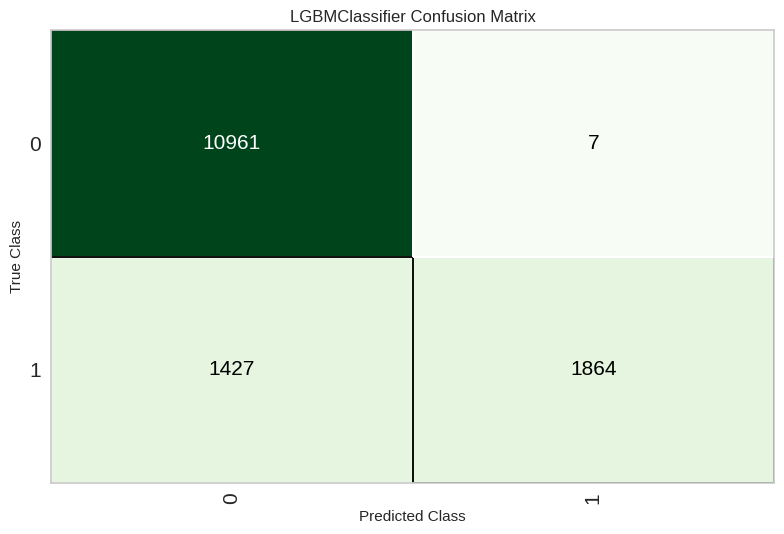

In [111]:
# Plot model successully
s.plot_model(best, plot = 'confusion_matrix')

In [112]:
# Save model successfully
s.plot_model(best, plot = 'confusion_matrix',save=True)

'Confusion Matrix.png'

In [113]:
s.predict_model(best)

age_of_car  age_of_policyholder  policy_tenure  population_density  \
48741    0.060000             0.405405       0.332278            1.000000   
44777    0.220000             0.094595       0.814686            0.116270   
57453    0.020000             0.283784       0.401107            0.102516   
63225    0.162943             0.223378       0.796319            0.051764   
29414    0.110000             0.567568       0.876558            0.079546   
...           ...                  ...            ...                 ...   
3664     0.020000             0.391892       0.096965            0.079546   
21056    0.020000             0.162162       0.058822            0.291660   
65733    0.062238             0.082498       0.817477            0.470987   
38130    0.100000             0.067568       0.064543            0.051764   
55301    0.200000             0.405405       0.056602            0.365231   

       gross_weight       RPM  ncap_rating  is_claim  prediction_label  \
48741      0.200299  0.660377            0         0                 0   
44777      0.431988  0.622642            2         0                 0   
57453      0.424514  1.000000            2         0                 0   
63225      1.000000  0.377358            3         1                 1   
29414      0.424514  1.000000            2         0                 0   
...             ...       ...          ...       ...               ...   
3664       0.200299  0.660377            0         0                 0   
21056      0.200299  0.660377            0         0                 0   
65733      0.424514  1.000000            2         1                 1   
38130      0.424514  1.000000            2         1                 0   
55301      0.536622  1.000000            0         0                 0   

       prediction_score  
48741            0.8705  
44777            0.9114  
57453            0.8886  
63225            0.8075  
29414            0.8911  
...                 ...  
3664             0.9284  
21056            0.9575  
65733            0.9688  
38130            0.9679  
55301            0.9702  

[14259 rows x 10 columns]

# Manual Models

## Regressors


### Decision Tree

In [114]:
# split data into x and y
# x is the independent variables, all variables except 'is_claim'
# y is the dependent variable, 'is_claim'
from sklearn.tree import DecisionTreeRegressor
X = data_processed_imp.drop('is_claim', axis=1)
y = data_processed_imp['is_claim']

# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create decision tree
clf = DecisionTreeRegressor(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8267410056806228
[[6428  890]
 [ 757 1431]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7318
           1       0.62      0.65      0.63      2188

    accuracy                           0.83      9506
   macro avg       0.76      0.77      0.76      9506
weighted avg       0.83      0.83      0.83      9506



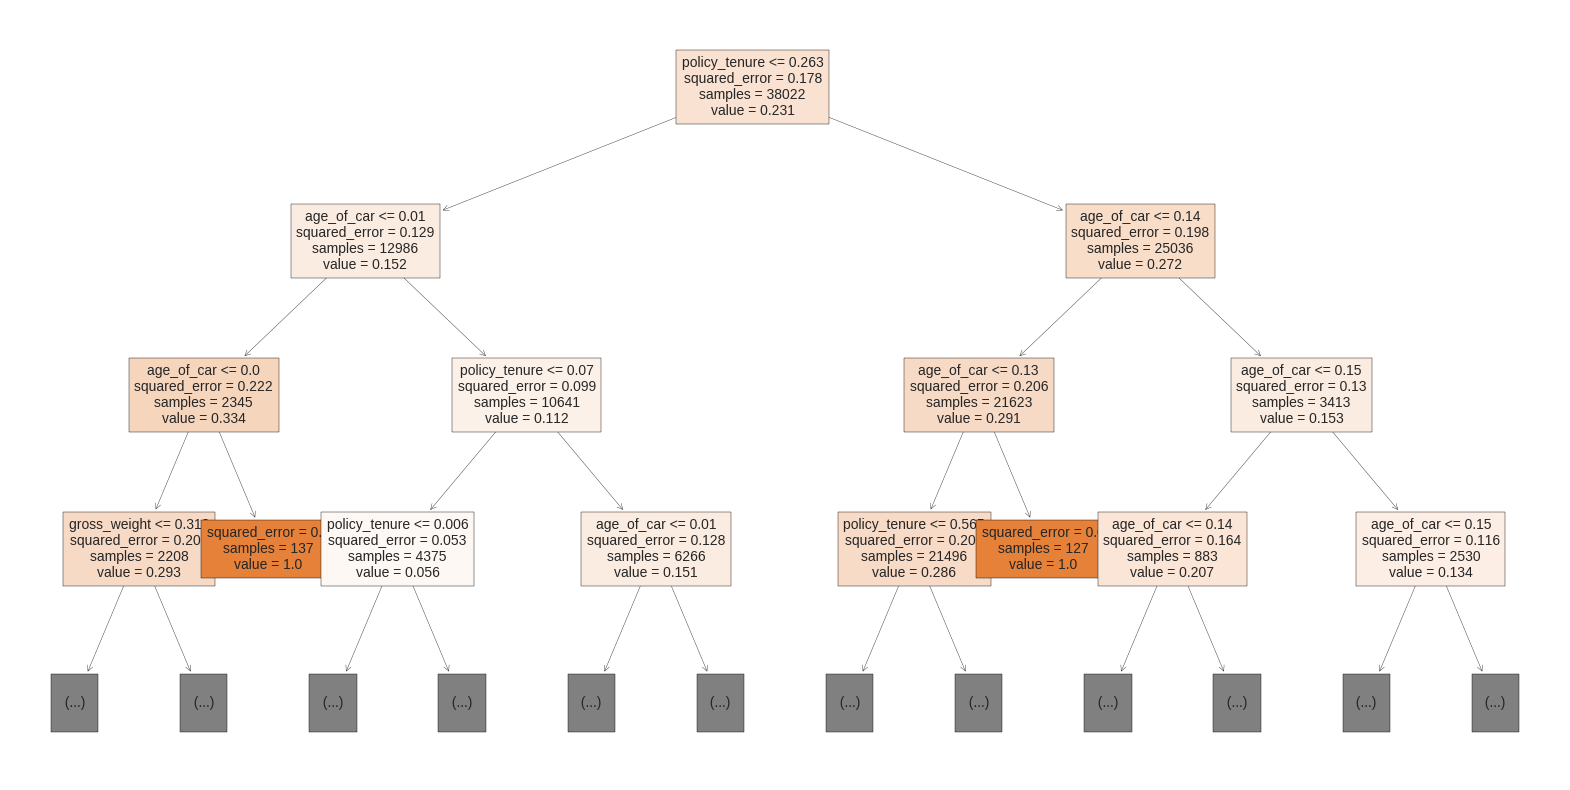

In [115]:
# show plot with max depth 2 with class shown
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, label='all',class_names=['No', 'Yes'], max_depth=3, fontsize=10)
plt.show()

### Gradient Boosting

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the classifier
clf = GradientBoostingRegressor(random_state=1)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

Mean Squared Error (MSE): 0.10295728334886033
Mean Absolute Error (MAE): 0.23967410037158163
R-squared (R^2): 0.4189507141116433


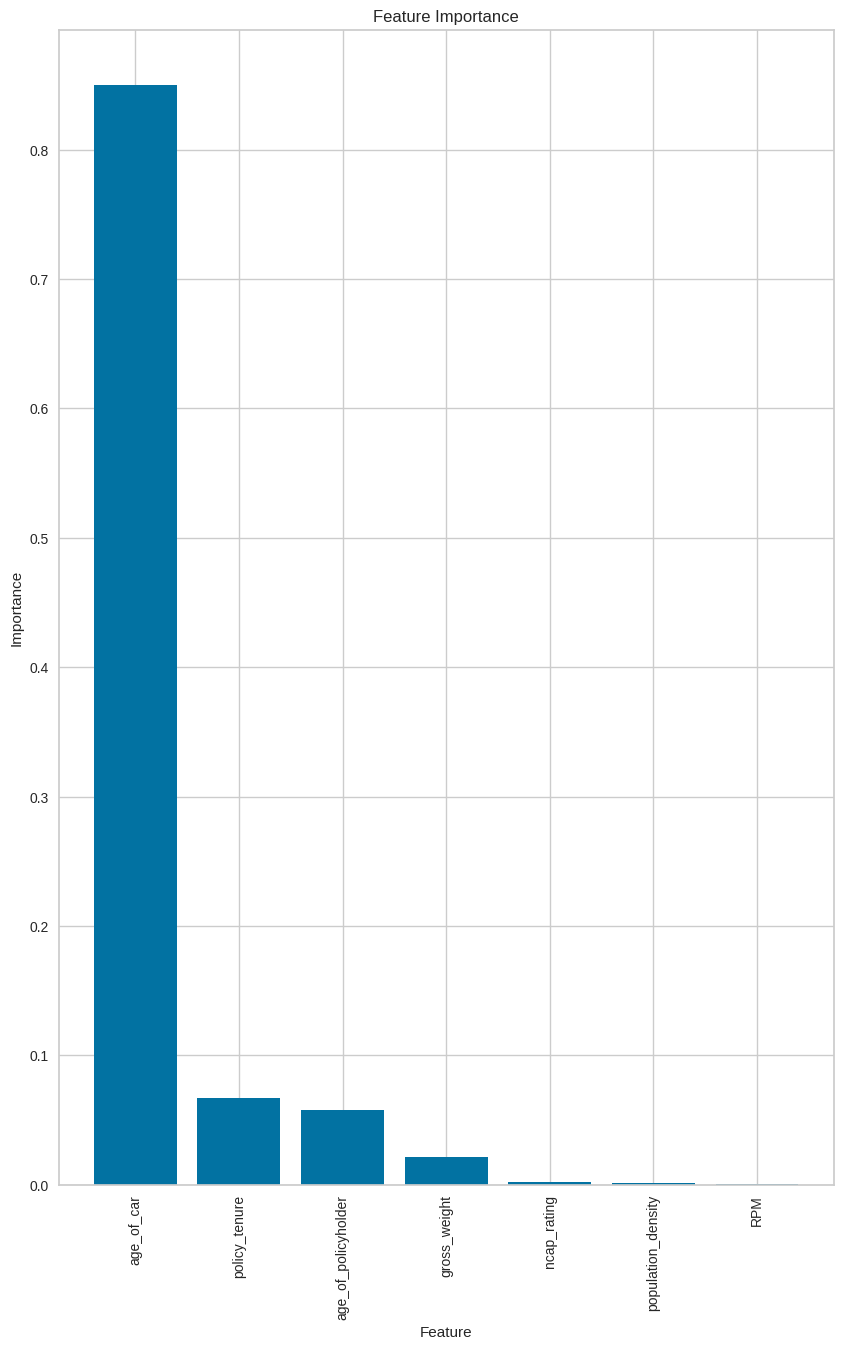

In [117]:
import matplotlib.pyplot as plt

# Assuming you have already defined and trained your model (clf)
# Feature names if available
feature_names = X_train.columns.tolist()  # Replace with your feature names if available

# Get feature importances
feature_importance = clf.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 15))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.savefig("Feature_importance1.png")
plt.show()


In [118]:
X_train.head()

age_of_car  age_of_policyholder  policy_tenure  population_density  \
3001     0.080000             0.459459       0.858043            0.116270   
61395    0.003306             0.164715       0.670509            0.116270   
26000    0.040000             0.216216       0.758836            0.116270   
5259     0.010000             0.067568       0.738013            0.079546   
65325    0.030000             0.620221       0.773584            0.239459   

       gross_weight       RPM  ncap_rating  
3001       0.200299  0.660377            0  
61395      0.656203  0.471698            5  
26000      1.000000  0.377358            3  
5259       0.424514  1.000000            2  
65325      0.424514  1.000000            2

### LightGBM model

In [119]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Parameters for light gbm model at standard value from library
params = {
    'objective': 'regression',
    'metric': 'mse'
}

# dataset for gbm
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


In [120]:
# Train the model
num_round=100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 38022, number of used features: 7
[LightGBM] [Info] Start training from score 0.230919


In [121]:
# Predict on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

confusion_mat = confusion_matrix(y_test, np.round(y_pred).astype(int))

Mean Squared Error (MSE): 0.08481658177134925
Mean Absolute Error (MAE): 0.1862451690774525
R-squared (R^2): 0.5213295002865923


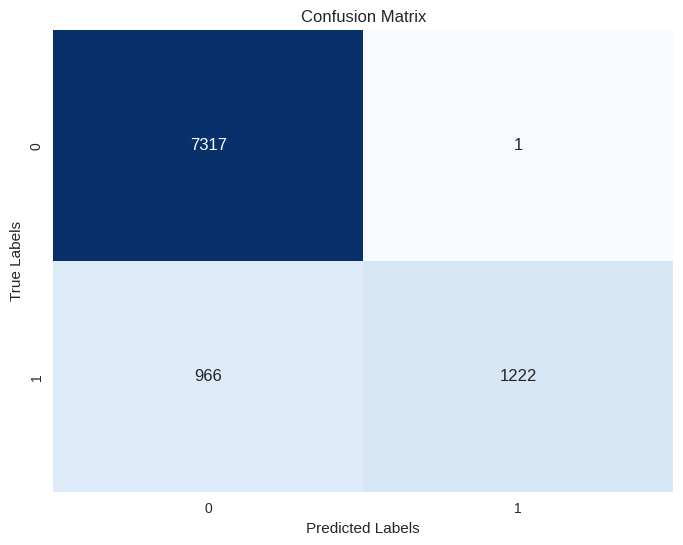

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Linear Regression

In [123]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Add a constant term to the independent variables for intercept term
X_train = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               is_claim   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     157.7
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          8.77e-231
Time:                        01:26:45   Log-Likelihood:                -20551.
No. Observations:               38022   AIC:                         4.112e+04
Df Residuals:                   38014   BIC:                         4.119e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1633    

## Classifiers


### Decision Tree

In [124]:
# split data into x and y
# x is the independent variables, all variables except 'is_claim'
# y is the dependent variable, 'is_claim'
X = data_processed_imp.drop('is_claim', axis=1)
y = data_processed_imp['is_claim']

# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create decision tree
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8266358089627603
[[6430  888]
 [ 760 1428]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7318
           1       0.62      0.65      0.63      2188

    accuracy                           0.83      9506
   macro avg       0.76      0.77      0.76      9506
weighted avg       0.83      0.83      0.83      9506



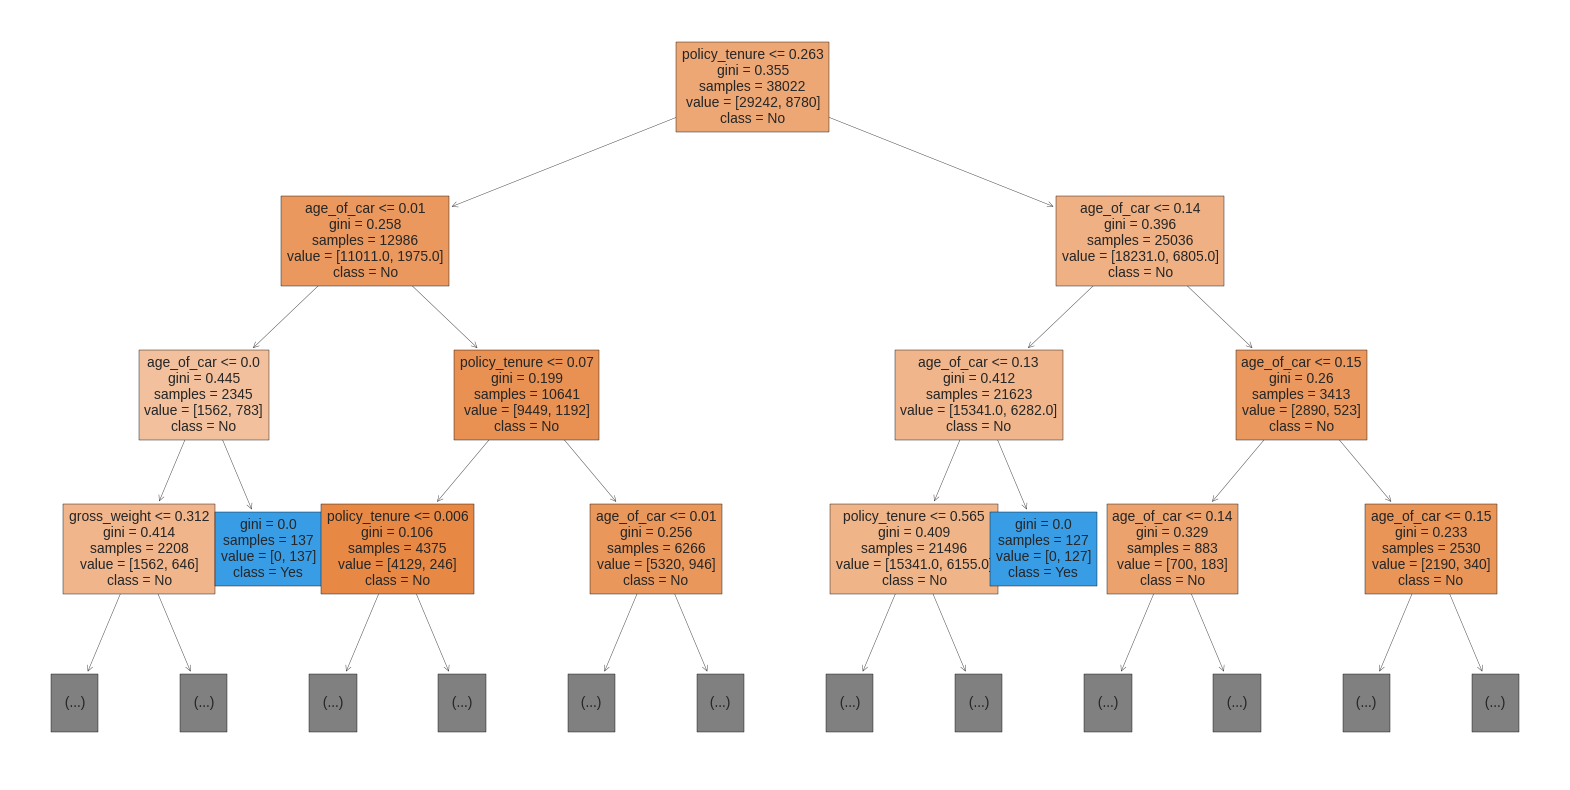

In [125]:
# show plot with max depth 2 with class shown
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, label='all',class_names=['No', 'Yes'], max_depth=3, fontsize=10)
plt.show()

### Gradient Boosting

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the classifier
clf = GradientBoostingClassifier(random_state=1)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.882705659583421
Confusion Matrix:
 [[7318    0]
 [1115 1073]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      7318
           1       1.00      0.49      0.66      2188

    accuracy                           0.88      9506
   macro avg       0.93      0.75      0.79      9506
weighted avg       0.90      0.88      0.87      9506



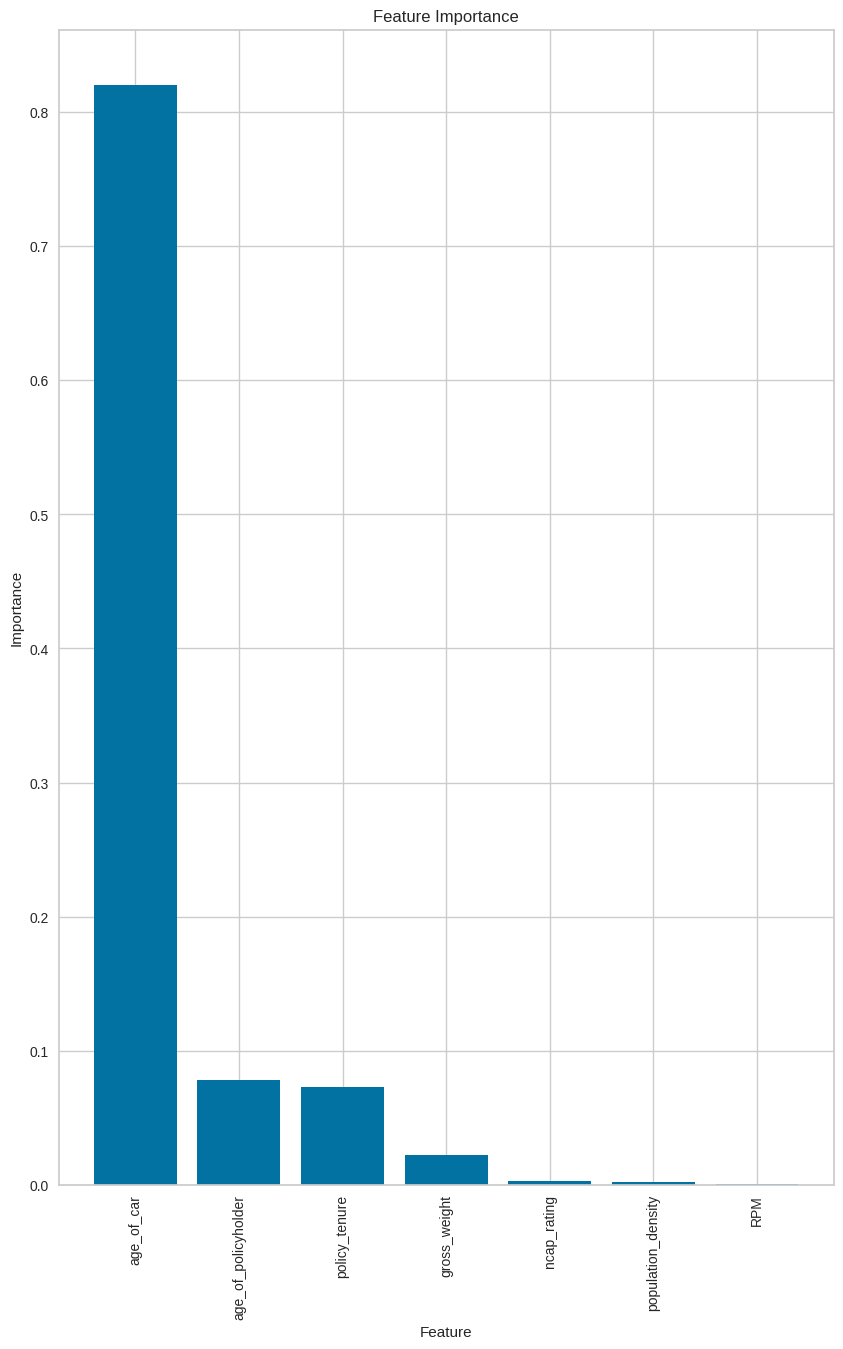

In [127]:
import matplotlib.pyplot as plt

# Assuming you have already defined and trained your model (clf)
# Feature names if available
feature_names = X_train.columns.tolist()  # Replace with your feature names if available

# Get feature importances
feature_importance = clf.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 15))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.savefig("Feature_importance2.png")
plt.show()


In [128]:
X_train.head()

age_of_car  age_of_policyholder  policy_tenure  population_density  \
3001     0.080000             0.459459       0.858043            0.116270   
61395    0.003306             0.164715       0.670509            0.116270   
26000    0.040000             0.216216       0.758836            0.116270   
5259     0.010000             0.067568       0.738013            0.079546   
65325    0.030000             0.620221       0.773584            0.239459   

       gross_weight       RPM  ncap_rating  
3001       0.200299  0.660377            0  
61395      0.656203  0.471698            5  
26000      1.000000  0.377358            3  
5259       0.424514  1.000000            2  
65325      0.424514  1.000000            2

### LightGBM model

In [129]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Parameters for light gbm model at standard value from library
params = {
    'objective': 'regression',
    'metric': 'mse'
}

# dataset for gbm
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


In [130]:
# Train the model
num_round=100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 38022, number of used features: 7
[LightGBM] [Info] Start training from score 0.230919


In [131]:
# Predict on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

confusion_mat = confusion_matrix(y_test, np.round(y_pred).astype(int))

Mean Squared Error: 0.08481658177134925


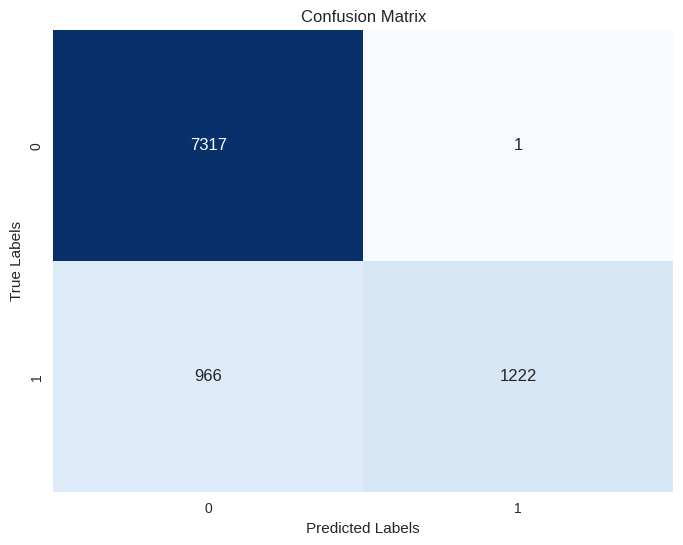

In [132]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Linear Regression

In [133]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Add a constant term to the independent variables for intercept term
X_train = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               is_claim   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     157.7
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          8.77e-231
Time:                        01:26:55   Log-Likelihood:                -20551.
No. Observations:               38022   AIC:                         4.112e+04
Df Residuals:                   38014   BIC:                         4.119e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1633    

## Clustering Human Elements and Car based elements

In [134]:
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [135]:
data_processed_imp.head()

age_of_car  age_of_policyholder  policy_tenure  population_density  \
35656        0.06             0.108108       0.772838            0.116270   
18435        0.01             0.283784       0.394050            0.892494   
21995        0.04             0.256757       0.629901            0.239459   
15498        0.15             0.554054       0.783670            0.116270   
38427        0.02             0.270270       0.774932            0.116270   

       gross_weight       RPM  ncap_rating  is_claim  
35656      1.000000  0.377358            3         0  
18435      0.431988  0.622642            2         0  
21995      0.200299  0.660377            0         0  
15498      0.424514  1.000000            2         0  
38427      0.155456  0.943396            2         0

In [136]:
X_Train=data_processed_imp.loc[:,['age_of_policyholder','policy_tenure','population_density']]

In [137]:
# Perform clustering on the training data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_Train)

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init='auto', random_state=42, tol=0.0001, verbose=0)

Text(0.5, 0, 'Population Density')

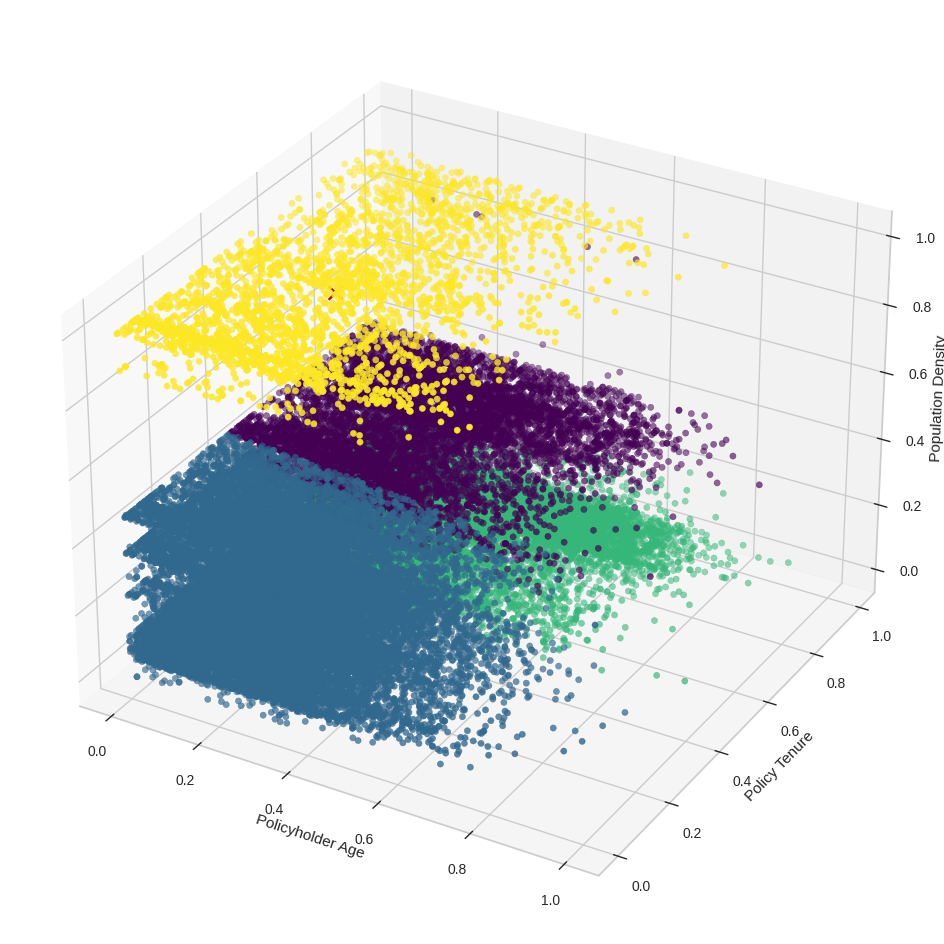

In [138]:
# Plot the clusters
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_Train.iloc[:, 0], X_Train.iloc[:, 1],X_Train.iloc[:, 2], c=kmeans.labels_, cmap='viridis',marker='o')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2], marker='x', s=100, c='r')
# ax.title('Clustering of Training Data')
ax.set_xlabel('Policyholder Age')
ax.set_ylabel('Policy Tenure')
ax.set_zlabel('Population Density')

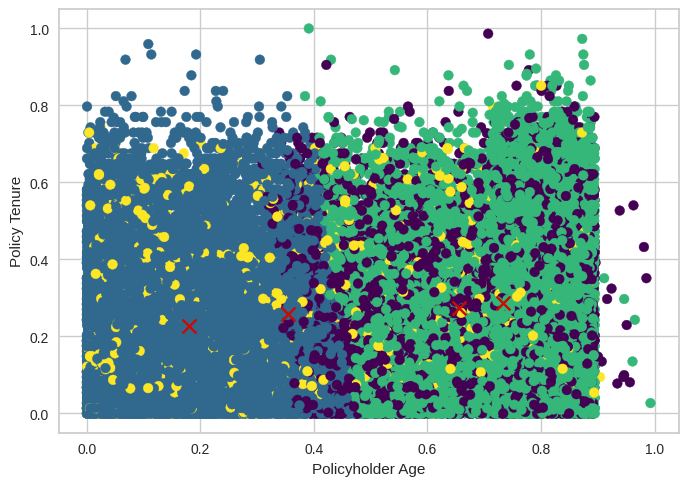

In [139]:
# Plot the clusters
import matplotlib.pyplot as plt
plt.scatter(X_Train.iloc[:, 1], X_Train.iloc[:, 0], c=kmeans.labels_, cmap='viridis',marker='o')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='x', s=100, c='r')
plt.xlabel('Policyholder Age')
plt.ylabel('Policy Tenure')
plt.show()

In [140]:
X_Train=data_processed_imp.loc[:,['age_of_car','gross_weight','ncap_rating','RPM']]

In [141]:
# Perform clustering on the training data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_Train)

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init='auto', random_state=42, tol=0.0001, verbose=0)

Text(0.5, 0, 'RPM')

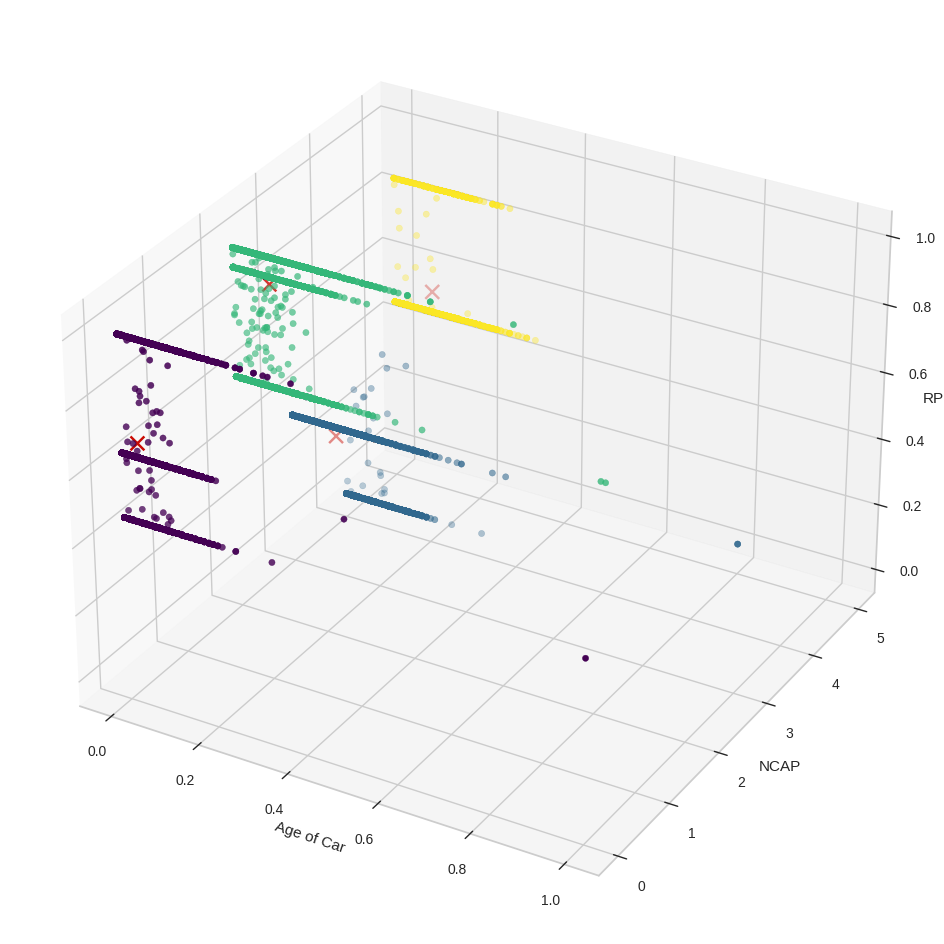

In [142]:
# Plot the clusters
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_Train.iloc[:, 0], X_Train.iloc[:, 2],X_Train.iloc[:, 3], c=kmeans.labels_, cmap='viridis',marker='o')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:, 3], marker='x', s=100, c='r')
# ax.title('Clustering of Training Data')
ax.set_xlabel('Age of Car')
ax.set_ylabel('NCAP')
ax.set_zlabel('RPM')

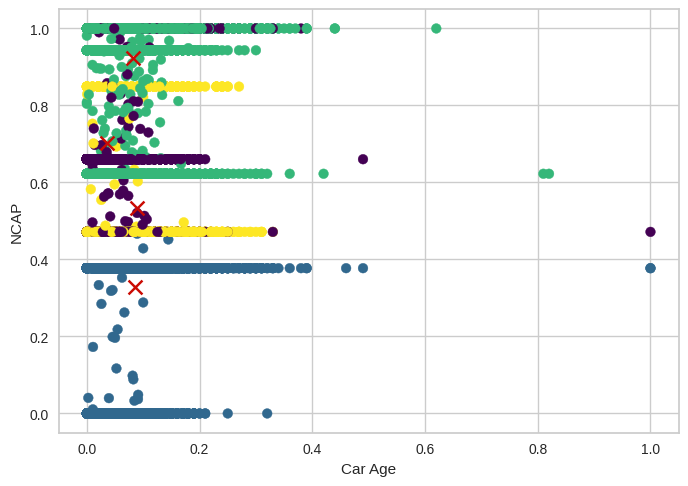

In [143]:
# Plot the clusters
import matplotlib.pyplot as plt
plt.scatter(X_Train.iloc[:, 0], X_Train.iloc[:, 3], c=kmeans.labels_, cmap='viridis',marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], marker='x', s=100, c='r')
plt.xlabel('Car Age')
plt.ylabel('NCAP')
plt.show()